# ACTIVATION FUNCTIONS

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2024-02-27 12:52:01.622276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0
Python 3.11.2


In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.callbacks import Callback
from tensorflow.python.keras.utils import np_utils
import numpy as np

In [3]:
(X_train_, y_train_), (X_test_, y_test_) = tf.keras.datasets.mnist.load_data()

## Data Preprocessing:

In [4]:
# Normalize data
X_train = X_train_.astype('float32') / 255.
X_test = X_test_.astype('float32') / 255.

In [5]:
# One hot encoding labels
y_train = np_utils.to_categorical(y_train_, 10)
y_test = np_utils.to_categorical(y_test_, 10)

In [6]:
# Flatten data
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

## Creating NN with sigmoid activation function:

In [7]:
nn_sigmoid = Sequential()
nn_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(350, activation='sigmoid'))
nn_sigmoid.add(Dense(100, activation='sigmoid'))
nn_sigmoid.add(Dense(10, activation='softmax'))

In [8]:
# Compile model with SGD
nn_sigmoid.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Creating NN with the ReLU activation function:

In [9]:
nn_relu = Sequential()
nn_relu.add(Dense(700, input_dim=784, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(350, activation='relu'))
nn_relu.add(Dense(100, activation='relu'))
nn_relu.add(Dense(10, activation='softmax'))

In [10]:
# Compile model with SGD
nn_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Creating NN with the ELU activation function:

In [11]:
nn_elu = Sequential()
nn_elu.add(Dense(700, input_dim=784, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(350, activation='elu'))
nn_elu.add(Dense(100, activation='elu'))
nn_elu.add(Dense(10, activation='softmax'))

In [12]:
# Compile model with SGD
nn_elu.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

## Callback function to store the loss values per batch:

In [13]:
import keras
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

## Training the models

In [15]:
n_epochs = 5
batch_size = 256
validation_split = 0.2

In [16]:
history_sigmoid = history_loss()
nn_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 13s - loss: 2.3129 - accuracy: 0.1087 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/5
188/188 - 12s - loss: 2.3014 - accuracy: 0.1137 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 3/5
188/188 - 12s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 4/5
188/188 - 12s - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/5
188/188 - 12s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060


In [17]:
history_relu = history_loss()
nn_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_relu], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 14s - loss: 2.1600 - accuracy: 0.3541 - val_loss: 1.8252 - val_accuracy: 0.5434
Epoch 2/5
188/188 - 12s - loss: 1.1398 - accuracy: 0.7193 - val_loss: 0.6587 - val_accuracy: 0.8173
Epoch 3/5
188/188 - 12s - loss: 0.5444 - accuracy: 0.8456 - val_loss: 0.4142 - val_accuracy: 0.8847
Epoch 4/5
188/188 - 11s - loss: 0.3955 - accuracy: 0.8861 - val_loss: 0.3742 - val_accuracy: 0.8867
Epoch 5/5
188/188 - 12s - loss: 0.3313 - accuracy: 0.9042 - val_loss: 0.2839 - val_accuracy: 0.9198


In [18]:
history_elu = history_loss()
nn_elu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_elu], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 13s - loss: 0.8499 - accuracy: 0.7861 - val_loss: 0.4259 - val_accuracy: 0.8913
Epoch 2/5
188/188 - 11s - loss: 0.3940 - accuracy: 0.8905 - val_loss: 0.3327 - val_accuracy: 0.9062
Epoch 3/5
188/188 - 12s - loss: 0.3311 - accuracy: 0.9042 - val_loss: 0.2960 - val_accuracy: 0.9161
Epoch 4/5
188/188 - 12s - loss: 0.3000 - accuracy: 0.9127 - val_loss: 0.2772 - val_accuracy: 0.9218
Epoch 5/5
188/188 - 12s - loss: 0.2792 - accuracy: 0.9186 - val_loss: 0.2602 - val_accuracy: 0.9251


## Plotting the losses:

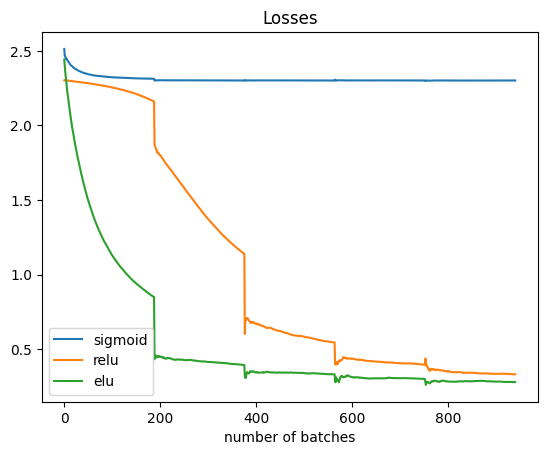

In [21]:
import matplotlib.pyplot as plt
# % matplotlib inline
plt.plot(np.arange(len(history_sigmoid.losses)),history_sigmoid.losses,label='sigmoid' )
plt.plot(np.arange(len(history_relu.losses)),history_relu.losses ,label='relu' )
plt.plot(np.arange(len(history_elu.losses)),history_elu.losses ,label='elu' )
plt.title('Losses')
plt.xlabel('number of batches')
plt.legend(loc='best')
plt.show()